In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set. Order data by date with recent first and display that row
results = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
results[0]


(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)

In [10]:
#Get the most recent date using the first row in cell above.
recent_date = [result[2] for result in results[:1]]
recent_date

['2017-08-23']

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

In [12]:
# Calculate the date one year from the last date in data set.
starting_date = recent_date - dt.timedelta(days=365)
starting_date

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
date_range = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= starting_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

dates_df = pd.DataFrame(date_range, columns = ["date", "prcp"])
dates_df





,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [14]:
# Sort the dataframe by date
dates_df.sort_values(by='date')

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [15]:
#Drop null values. Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html
dates_df = dates_df.dropna()
dates_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


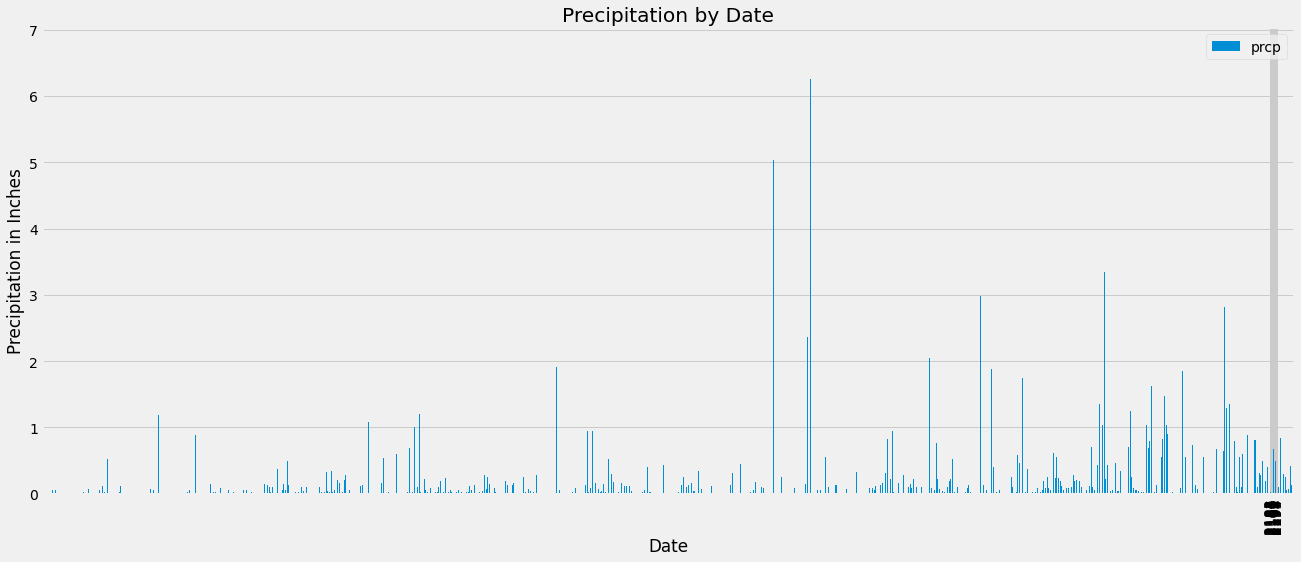

<Figure size 432x288 with 0 Axes>

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
climate_plot = dates_df.plot(kind="bar", title="Precipitation by Date", figsize=(20,8))
climate_plot.set_xticks([2016-8-23,2016-9-23,2016-10-23,2016-11-23, 2016-12-23, 2017-1-23, 2017-2-23, 2017-3-23, 2017-4-23, 2017-5-23, 2017-6-23, 2017-7-23,2017-8-23])
climate_plot.set_xlabel("Date")
climate_plot.set_ylabel("Precipitation in Inches")
plt.show()
plt.tight_layout()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dates_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
results = engine.execute('SELECT * FROM Station').fetchall()
results = len(results)
results

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = engine.execute('SELECT station, COUNT(Station) FROM Measurement GROUP BY station ORDER BY COUNT(station) DESC ').fetchall()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = engine.execute('SELECT station, MAX(tobs), MIN(tobs), AVG(tobs) FROM Measurement WHERE station == "USC00519281"').fetchall()
active_station

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [83]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Quert to get last 12 months from most active station ID.
station_query = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= starting_date).filter(Measurement.station == 'USC00519281').all()
station_query


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [84]:
#Save data in dataframe

active_station_df = pd.DataFrame(station_query, columns = ["date", "tobs"])
active_station_df.sort_values(by='date')
active_station_df = active_station_df.dropna()
active_station_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


<AxesSubplot:ylabel='Frequency'>

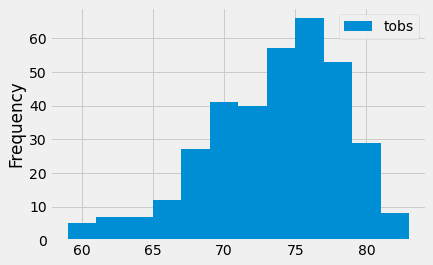

In [85]:
#Plot histogram
active_station_df.plot.hist(bins = 12)


# Close session

In [49]:
# Close Session
session.close()